# **K-Means**


当我们有未标记的数据(即没有定义类别或组的数据)时,一般会使用**k-means**做聚类。K -意味着算法根据所提供的特征迭代地将每个数据点分配给K组中的一个。基于特征相似度对数据点进行聚类。


![K-Means](https://miro.medium.com/max/2160/1*tWaaZX75oumVwBMcKN-eHA.png)

**质心** -质心是位于集群中心的数据点。在基于质心的聚类中，簇用质心表示。它是一种迭代算法，其中相似性的概念是由数据点离聚类质心的距离来推导的。

K-Means算法大致来说就是个两步迭代的算发

## **Data assignment step**


每个质心定义一个集群。在这一步中，每个数据点被分配到最近的质心，这是基于欧几里德距离的平方（欧氏距离）。因此，如果ci是集合C中质心的集合，那么每个数据点根据最小欧氏距离分配到一个聚类中。




## **Centroid update step**


在这一步中，将重新计算和更新质心。这是通过对指定给该质心集群的所有数据点取平均值来完成的。然后，算法在步骤1和步骤2之间迭代，直到满足一个停止条件。停止标准意味着没有数据点改变集群，距离的总和被最小化，或者达到某个最大的迭代次数。该算法保证收敛到一个结果。结果可能是局部最优的，这意味着用随机的初始中心点来评估算法的多次运行可能会得到更好的结果。K-Means的直觉可以用下图来表示:


![K-Means intuition](https://i.ytimg.com/vi/_aWzGGNrcic/hqdefault.jpg)

# **Choosing the value of K** 

 K- means算法依赖于为预定义的K值找到聚类数量和数据标签。为了找到数据中的聚类数量，我们需要对不同的K值运行K- means聚类算法，并比较结果。因此，K- means算法的性能取决于K的值，我们应该选择性能最好的K的最优值。有不同的技术可以找到最优的k值，最常见的技术是elbow plot。

# **The elbow method** 


在K-Means中，采用肘部方法确定最优聚类个数。


![Elbow method in K-Means](https://www.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/995b8b58-06f1-4884-a2a1-f3648428e947.png)

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [7]:
import warnings

warnings.filterwarnings('ignore')

# **Import dataset** 

In [9]:
data = '~/Live.csv'

df = pd.read_csv(data)


# **Exploratory data analysis** 


In [10]:
df.shape #看下size

(7050, 16)

In [5]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [11]:
df.info() #看下数据

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [13]:
df.isnull().sum() #看下缺失

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

后四列没啥用

In [14]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

再看看处理后的数据

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


可以看到，有3个categorical(data type = object)和9个numeric(data type = int64)。

skim一下

In [16]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


看下有无重复ID

In [19]:
len(df['status_id'].unique())

6997

看下有无重复 statue_published

In [20]:
len(df['status_published'].unique())

6913

In [21]:
# 看下有多少个type

df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [22]:
df.drop(['status_id', 'status_published'], axis=1, inplace=True) # 就把那两个id之类的变量drop掉

In [19]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [23]:
X = df

y = df['status_type']

# **Convert categorical variable into integers**

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['status_type'] = le.fit_transform(X['status_type'])

y = le.transform(y)

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
status_type      7050 non-null int64
num_reactions    7050 non-null int64
num_comments     7050 non-null int64
num_shares       7050 non-null int64
num_likes        7050 non-null int64
num_loves        7050 non-null int64
num_wows         7050 non-null int64
num_hahas        7050 non-null int64
num_sads         7050 non-null int64
num_angrys       7050 non-null int64
dtypes: int64(10)
memory usage: 550.9 KB


In [23]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


# **Feature Scaling**

In [27]:
cols = X.columns

In [29]:
from sklearn.preprocessing import MinMaxScaler #数据归一化

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [30]:
X = pd.DataFrame(X, columns=[cols])

In [31]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


# **K-Means model with two clusters**

In [32]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

# **模型的参数学习**

In [33]:
kmeans.cluster_centers_

array([[3.28506857e-01, 3.90710874e-02, 7.54854864e-04, 7.53667113e-04,
        3.85438884e-02, 2.17448568e-03, 2.43721364e-03, 1.20039760e-03,
        2.75348016e-03, 1.45313276e-03],
       [9.54921576e-01, 6.46330441e-02, 2.67028654e-02, 2.93171709e-02,
        5.71231462e-02, 4.71007076e-02, 8.18581889e-03, 9.65207685e-03,
        8.04219428e-03, 7.19501847e-03]])

KMeans算法通过尝试将样本分离到n组方差相等的样本中来对数据进行聚类，最小化一种称为惯性的准则，或称为聚类内平方和准则，惯性或聚类内平方和准则可以被视为内部相干聚类的度量。

K -means算法将一组N个样本X分成K个不相交的聚类C，每个聚类用样本的均值j来描述。这些平均值通常称为星系团质心。

K-means算法的目标是选择惯性最小的质心，或聚类平方和准则。

 # **Check quality of weak classification by the model**

In [35]:
labels = kmeans.labels_

# 检查下有多少label是被正确标记的
correct_labels = sum(y == labels)

correct_labels


63

In [36]:
print('准确率: {0:0.2f}'. format(correct_labels/float(y.size)))

准确率: 0.01


不太行

# **Use elbow method to find optimal number of clusters**

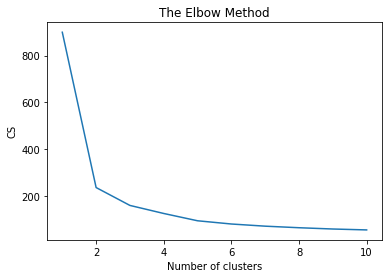

In [37]:
# 画手肘图找最佳的k值

from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()


- 图中可以看出，当k=2时比较好

- 但是当k=2时，accuracy才为0.1%,比较弱.

还是再看看当k=345678之类的时候情况如何吧。

### K-Means model with 3 clusters

In [41]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print('准确率: {0:0.2f}'. format(correct_labels/float(y.size)))

准确率: 0.02


### K-Means model with 4 clusters

In [42]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print('准确率: {0:0.2f}'. format(correct_labels/float(y.size)))

准确率: 0.62


# **Results and conclusion**

即便肘部图gao su w